In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math
from sklearn import preprocessing
from sklearn import metrics 
import seaborn as sns 

2021-10-26 09:56:02.841676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/peshal/opencv/build/lib
2021-10-26 09:56:02.841698: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# loading mnist dataset and spliting them into train and test 
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
# Extracting 100 images from test dataset  to be use for predicting
check_image=X_test[0:100]
X_test=X_test[100:]
Y_test=Y_test[100:]

In [9]:
#normalizing test and train data into -0.5 to 0.5
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
X_train=X_train/255-0.5
X_test=X_test/255-0.5

In [10]:
# reshaping two dimensional image of size 28*28 into one dimensional of shape 784
X_train_reshaped=X_train.reshape((len(X_train),-1))
X_test_reshaped=X_test.reshape((len(X_test),-1))

In [12]:
## This class contains all the function used for implementing logistic regression in input data
class LogisticRegression:
    
    def __init__(self,epochs,learning_rate,batches,weights=None):
        self.epochs=epochs
        self.learning_rate=learning_rate
        self.batches=batches
        self.weights=weights
        
    def get_weights(self):
        return self.weights

    ## This function is called to train the model by passing training input data with their label
    ## Logistic Regression model is used and parameters are tweaked according the the input and output so that we obtain maximum likelihood 
    def fit(self,X_train,Y_train):
        ## Input label is to be preprocessed so that it can be used in classification 
        lb = preprocessing.LabelBinarizer()
        lb.fit(Y_train)
        Y_train=lb.transform(Y_train)
        X_train_new=np.ones((len(X_train),len(X_train[0])+1))
        Number_features=len(X_train_new[0])
        X_train_new[:,1:]=X_train
        accuracy=0
        Number_of_labels=len(Y_train[0])
        ## These are the parameters whose value are to be set
        coefficients=np.random.rand(Number_of_labels,Number_features)
        mean_error=1
        number_of_trainingset=int(len(X_train)/self.batches)
        print(number_of_trainingset)
        for num_iter in range(self.epochs):
            mean_error=0
            for batch in range(self.batches):
                start=0
                end=0;
                if (batch+1)*number_of_trainingset < len(X_train_new):
                    start=int(batch*number_of_trainingset)
                    end=int(start+number_of_trainingset)
                else:
                    start=int(batch*number_of_trainingset)
                    end=int(len(X_train_new))
                X_train_batch=X_train_new[start:end,:]
                Y_train_batch=Y_train[start:end,:]
                coefficients_transpose=np.transpose(coefficients)
                hypothesis=np.zeros(Y_train_batch.shape)
                loss_func=np.zeros(Y_train_batch.shape)
                for i in range(len(X_train_batch)):
                    for j in range(Number_of_labels):
                        hypothesis_value=np.dot(X_train_batch[i,:],coefficients_transpose[:,j])
                        hypothesis[i][j]=1/(1+math.exp(-hypothesis_value))
                        value1=hypothesis[i][j]
                        value2=1-hypothesis[i][j]
                        if value1<=0 :
                            value1=0.00000000000001
                        elif value2<=0 :
                            value2=0.00000000000001
                        loss_func[i][j]=-Y_train_batch[i][j]*math.log10(value1)-(1-Y_train_batch[i][j])*math.log10(value2)
                cost_func=np.sum(loss_func,axis=0)/len(loss_func)
                cost_func_derivative=np.dot(np.transpose((hypothesis-Y_train_batch)),X_train_batch)/len(X_train_batch)
                coefficients=coefficients-self.learning_rate*cost_func_derivative
                mean_error=np.sum(cost_func)/len(cost_func)
                Y_predict=np.where(hypothesis>=0.5,1,0)
                Y_predict=np.argmax(Y_predict,axis=1)
                Y_train_batch=np.argmax(Y_train_batch,axis=1)
                unique_value,counts=np.unique(Y_predict==Y_train_batch,return_counts=True)
            print("error: "+mean_error.__str__()+"  accuracy : "+( counts[1]/np.sum(counts)*100).__str__()+"%")
        print(cost_func)
        self.weights=coefficients
    
    ## This function takes test data and predict output for that data 
    ## predicted output is compared with actual output and error metrices is obtained to comapre how good is the model
    def test(self,X_test,Y_test):
        lb = preprocessing.LabelBinarizer()
        lb.fit(Y_test)
        Y_test=lb.transform(Y_test)
        X_test_new=np.ones((len(X_test),len(X_test[0])+1))
        Number_features=len(X_test_new[0])
        X_test_new[:,1:]=X_test
        accuracy=0
        Number_of_labels=len(Y_test[0])
        mean_error=1
        loss_func=np.zeros(Y_test.shape)
        hypothesis=np.zeros(Y_test.shape)
        weights_transpose=np.transpose(self.weights)
        for i in range(len(X_test_new)):
            for j in range(Number_of_labels):
                hypothesis_value=np.dot(X_test_new[i,:],weights_transpose[:,j]) 
                hypothesis[i][j]=1/(1+math.exp(-hypothesis_value))
                value1=hypothesis[i][j]
                value2=1-hypothesis[i][j]
                if value1<=0 :
                    value1=0.00000000000001
                elif value2<=0 :
                    value2=0.00000000000001
                loss_func[i][j]=-Y_test[i][j]*math.log10(value1)-(1-Y_test[i][j])*math.log10(value2)
        cost_func=np.sum(loss_func,axis=0)/len(loss_func)
        mean_error=np.sum(cost_func)/len(cost_func)
        Y_predict=np.where(hypothesis>=0.5,1,0)
        Y_predict=np.argmax(Y_predict,axis=1)
        Y_test=np.argmax(Y_test,axis=1)
        unique_value,counts=np.unique(Y_predict==Y_test,return_counts=True)
#         print("accuracy",)
        cf_matrix=metrics.confusion_matrix(Y_test,Y_predict, labels=[0,1,2,3,4,5,6,7,8,9])
        print(metrics.classification_report(Y_test,Y_predict, labels=[0,1,2,3,4,5,6,7,8,9],zero_division=0))
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        sns.heatmap(cf_matrix, annot=True)
        print("error: "+mean_error.__str__()+"  accuracy : "+ (counts[1]/np.sum(counts)*100).__str__()+"%")

    def predict(self,input_image):
        input_image=input_image/255-0.5
        input_image=input_image.astype(np.float32)
        input_image=input_image.reshape((-1))
        input_image_modified=np.ones(len(input_image)+1)
        input_image_modified[1:]=input_image
        hypothesis=np.zeros((len(self.weights)))
        weights_transpose=np.transpose(self.weights)
        Number_of_labels=len(self.weights)
        for j in range(Number_of_labels):
            hypothesis_value=np.dot(input_image_modified,weights_transpose[:,j]) 
            hypothesis[j]=1/(1+math.exp(-hypothesis_value))
        return np.where(hypothesis>=0.5,1,0)

In [13]:
model=LogisticRegression(75,0.2,10)
model.fit(X_train_reshaped,Y_train)

6000
error: 5.151480448437217  accuracy : 9.783333333333333%
error: 3.9200532768354615  accuracy : 9.783333333333333%
error: 2.6887449632713203  accuracy : 9.783333333333333%
error: 1.4666837388997886  accuracy : 9.983333333333333%
error: 0.5928174072543596  accuracy : 19.916666666666664%
error: 0.4011482071220704  accuracy : 31.016666666666666%
error: 0.33741582211678073  accuracy : 35.85%
error: 0.28760531572159287  accuracy : 40.68333333333333%
error: 0.24684422352563865  accuracy : 44.766666666666666%
error: 0.21307726870268628  accuracy : 48.3%
error: 0.1849578880321924  accuracy : 51.61666666666667%
error: 0.16147514999418575  accuracy : 54.85%
error: 0.14185237790397404  accuracy : 57.81666666666667%
error: 0.12548750619543098  accuracy : 60.56666666666667%
error: 0.11188905774409814  accuracy : 63.016666666666666%
error: 0.10062434965753006  accuracy : 64.91666666666667%
error: 0.0912953144484216  accuracy : 66.56666666666666%
error: 0.0835464062794225  accuracy : 68.0833333333

              precision    recall  f1-score   support

           0       0.43      0.99      0.60       972
           1       0.96      0.95      0.96      1121
           2       0.94      0.80      0.86      1024
           3       0.91      0.81      0.86       999
           4       0.90      0.83      0.87       968
           5       0.91      0.67      0.77       885
           6       0.95      0.85      0.90       948
           7       0.94      0.86      0.90      1013
           8       0.90      0.68      0.77       972
           9       0.94      0.71      0.81       998

    accuracy                           0.82      9900
   macro avg       0.88      0.81      0.83      9900
weighted avg       0.88      0.82      0.83      9900

error: 0.0353768040297964  accuracy : 81.76767676767676%


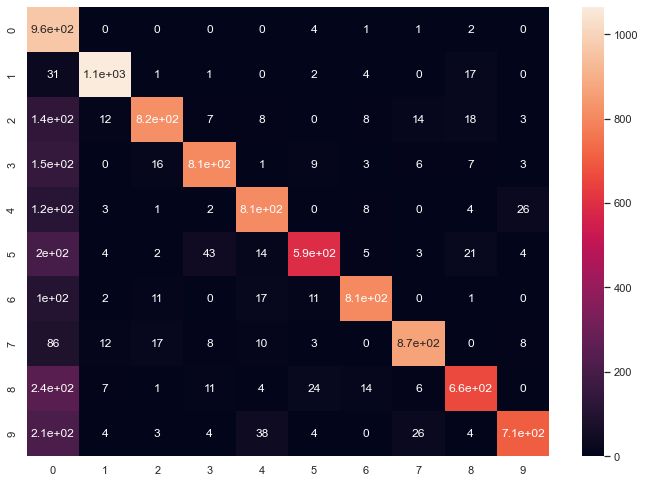

In [14]:
model.test(X_test=X_test_reshaped,Y_test=Y_test)

4


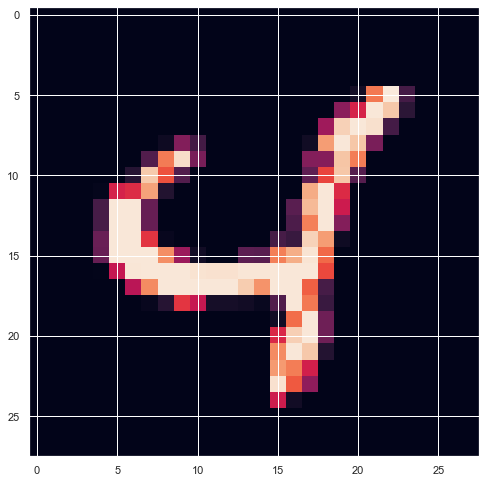

In [67]:
choose_image=np.random.randint(0,100)
print(np.argmax(model.predict(check_image[choose_image])))
plt.imshow(check_image[choose_image])

In [16]:
weights=model.get_weights()